In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [3]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [4]:
# Input readable date
start_readable_date = "01-04-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-04-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1743440400
1746032399


In [5]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [6]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature   timestamp  volt  \
1743440452  26.17821     96.23   1009.54        26.83  1743440452  4.05   
1743440512  26.19694     96.28   1009.57        26.84  1743440512  4.05   
1743440572  26.21744     96.34   1009.53        26.85  1743440572  4.05   
1743440632  26.19753     96.34   1009.54        26.83  1743440632  4.05   
1743440692  26.19753     96.34   1009.51        26.83  1743440692  4.05   

            rainfall  rainrate  
1743440452       NaN       NaN  
1743440512       NaN       NaN  
1743440572       NaN       NaN  
1743440632       NaN       NaN  
1743440692       NaN       NaN  
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1743440408  26.17771  95.28176  1009.758    0.2794       0.0     27.00008   
1743440423  26.16456  95.31228  1009.763    0.2794       0.0     26.98138   
1743440438  26.14620  95.28367  1009.761    0.2794       0.0     26.96

In [7]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1745842183,24.01747,86.47,1009.42,26.46,1745842183,4.13,NaN,NaN
1745842243,24.00148,86.54,1009.46,26.43,1745842243,4.13,NaN,NaN
1745842303,23.97010,86.53,1009.43,26.40,1745842303,4.12,NaN,NaN
1745842363,23.94833,86.57,1009.42,26.37,1745842363,4.13,NaN,NaN
1745842423,23.92847,86.62,1009.44,26.34,1745842423,4.14,NaN,NaN
1745842483,23.92396,86.75,1009.43,26.31,1745842483,4.13,NaN,NaN
1745842543,23.93738,86.82,1009.46,26.31,1745842543,4.13,NaN,NaN
1745842603,23.85758,86.66,1009.46,26.26,1745842603,4.13,NaN,NaN
1745842663,23.85351,86.69,1009.56,26.25,1745842663,4.13,NaN,NaN
1745842723,23.86860,86.82,1009.51,26.24,1745842723,4.13,NaN,NaN


In [8]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1745842183,24.01747,86.47,1009.42,26.46,1745842183,4.13,NaN,NaN
1745842243,24.00148,86.54,1009.46,26.43,1745842243,4.13,NaN,NaN
1745842303,23.97010,86.53,1009.43,26.40,1745842303,4.12,NaN,NaN
1745842363,23.94833,86.57,1009.42,26.37,1745842363,4.13,NaN,NaN
1745842423,23.92847,86.62,1009.44,26.34,1745842423,4.14,NaN,NaN
1745842483,23.92396,86.75,1009.43,26.31,1745842483,4.13,NaN,NaN
1745842543,23.93738,86.82,1009.46,26.31,1745842543,4.13,NaN,NaN
1745842603,23.85758,86.66,1009.46,26.26,1745842603,4.13,NaN,NaN
1745842663,23.85351,86.69,1009.56,26.25,1745842663,4.13,NaN,NaN
1745842723,23.86860,86.82,1009.51,26.24,1745842723,4.13,NaN,NaN


In [9]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

In [10]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
rainfall                            float64
rainrate                            float64
dtype: object

In [11]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [12]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1743440452,26.17821,96.23,1009.54,26.83,2025-04-01 00:00:52+07:00,4.05,NaN,NaN
1743440512,26.19694,96.28,1009.57,26.84,2025-04-01 00:01:52+07:00,4.05,NaN,NaN
1743440572,26.21744,96.34,1009.53,26.85,2025-04-01 00:02:52+07:00,4.05,NaN,NaN
1743440632,26.19753,96.34,1009.54,26.83,2025-04-01 00:03:52+07:00,4.05,NaN,NaN
1743440692,26.19753,96.34,1009.51,26.83,2025-04-01 00:04:52+07:00,4.05,NaN,NaN
1743440752,26.17938,96.35,1009.51,26.81,2025-04-01 00:05:52+07:00,4.05,NaN,NaN
1743440813,26.18290,96.37,1009.53,26.81,2025-04-01 00:06:53+07:00,4.05,NaN,NaN
1743440873,26.19110,96.36,1009.47,26.82,2025-04-01 00:07:53+07:00,4.05,NaN,NaN
1743440933,26.19461,96.38,1009.47,26.82,2025-04-01 00:08:53+07:00,4.05,NaN,NaN
1743440993,26.20281,96.37,1009.41,26.83,2025-04-01 00:09:53+07:00,4.05,NaN,NaN


In [13]:
datacuaca = cuaca1
datacuaca2 = cuaca2

Visualisasi missing values untuk datacuaca:


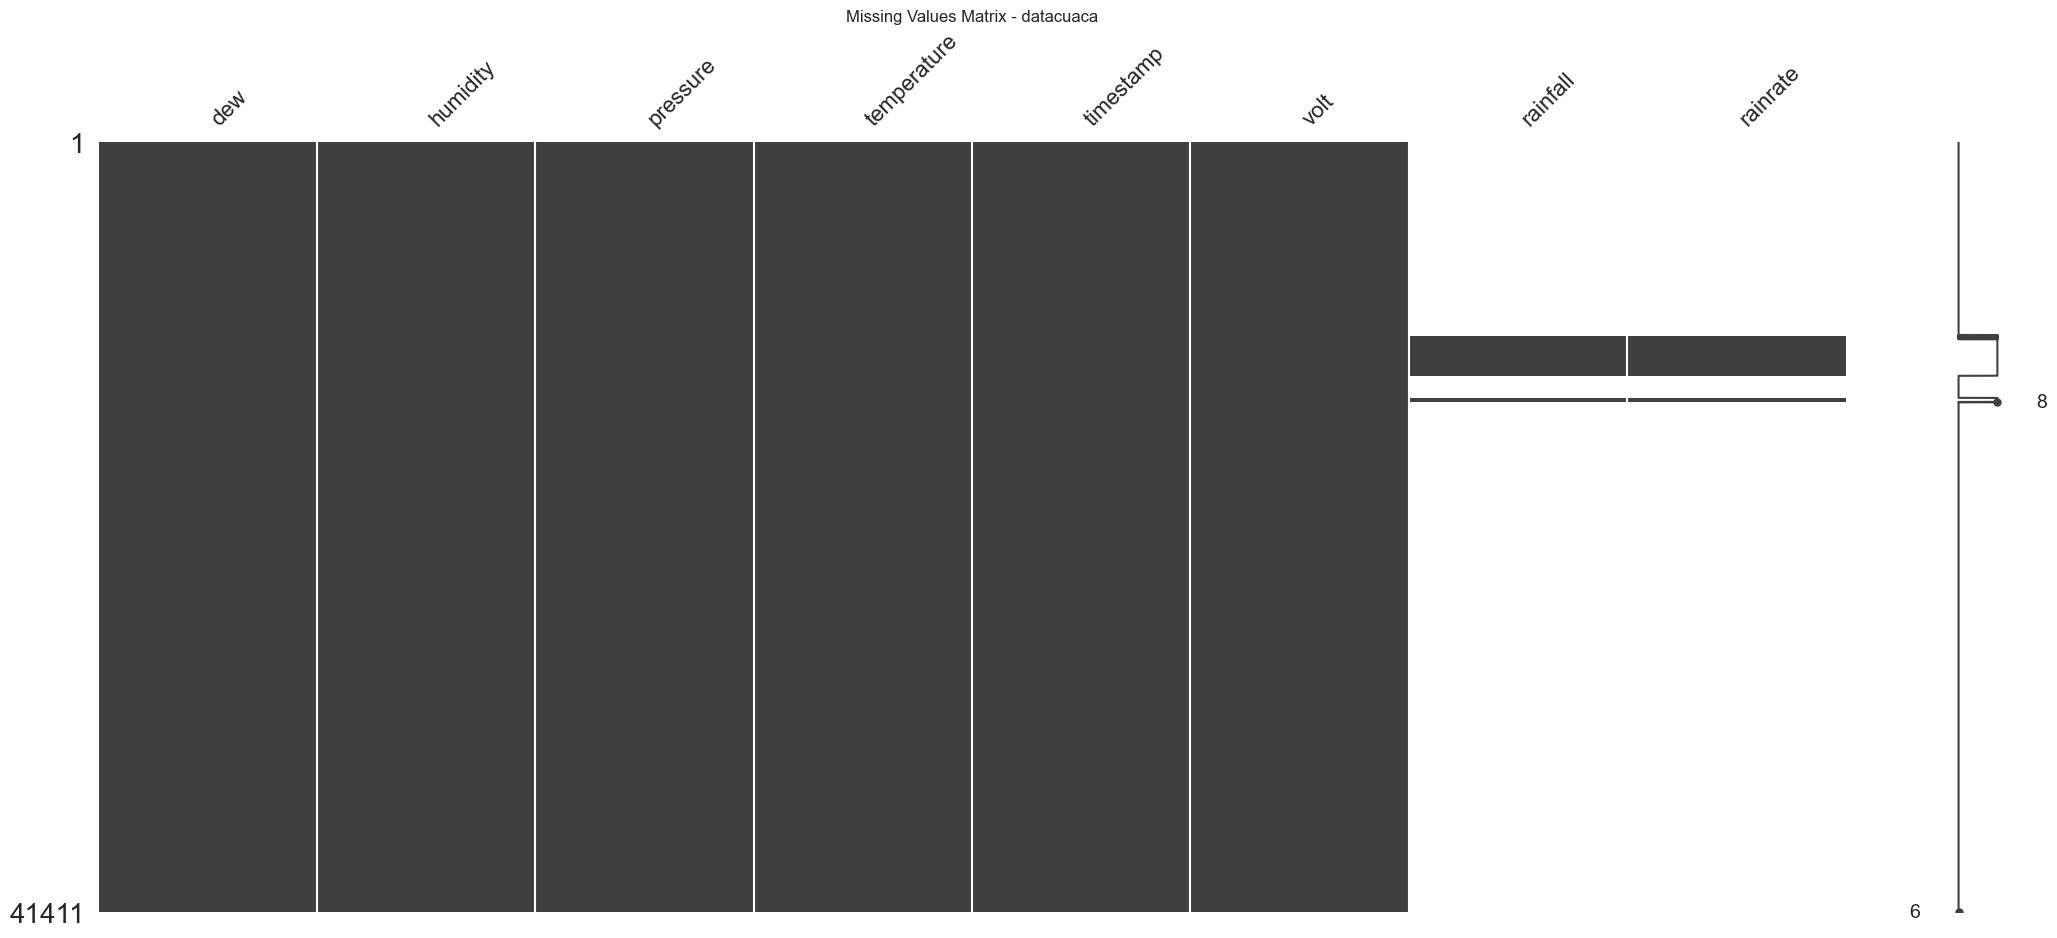

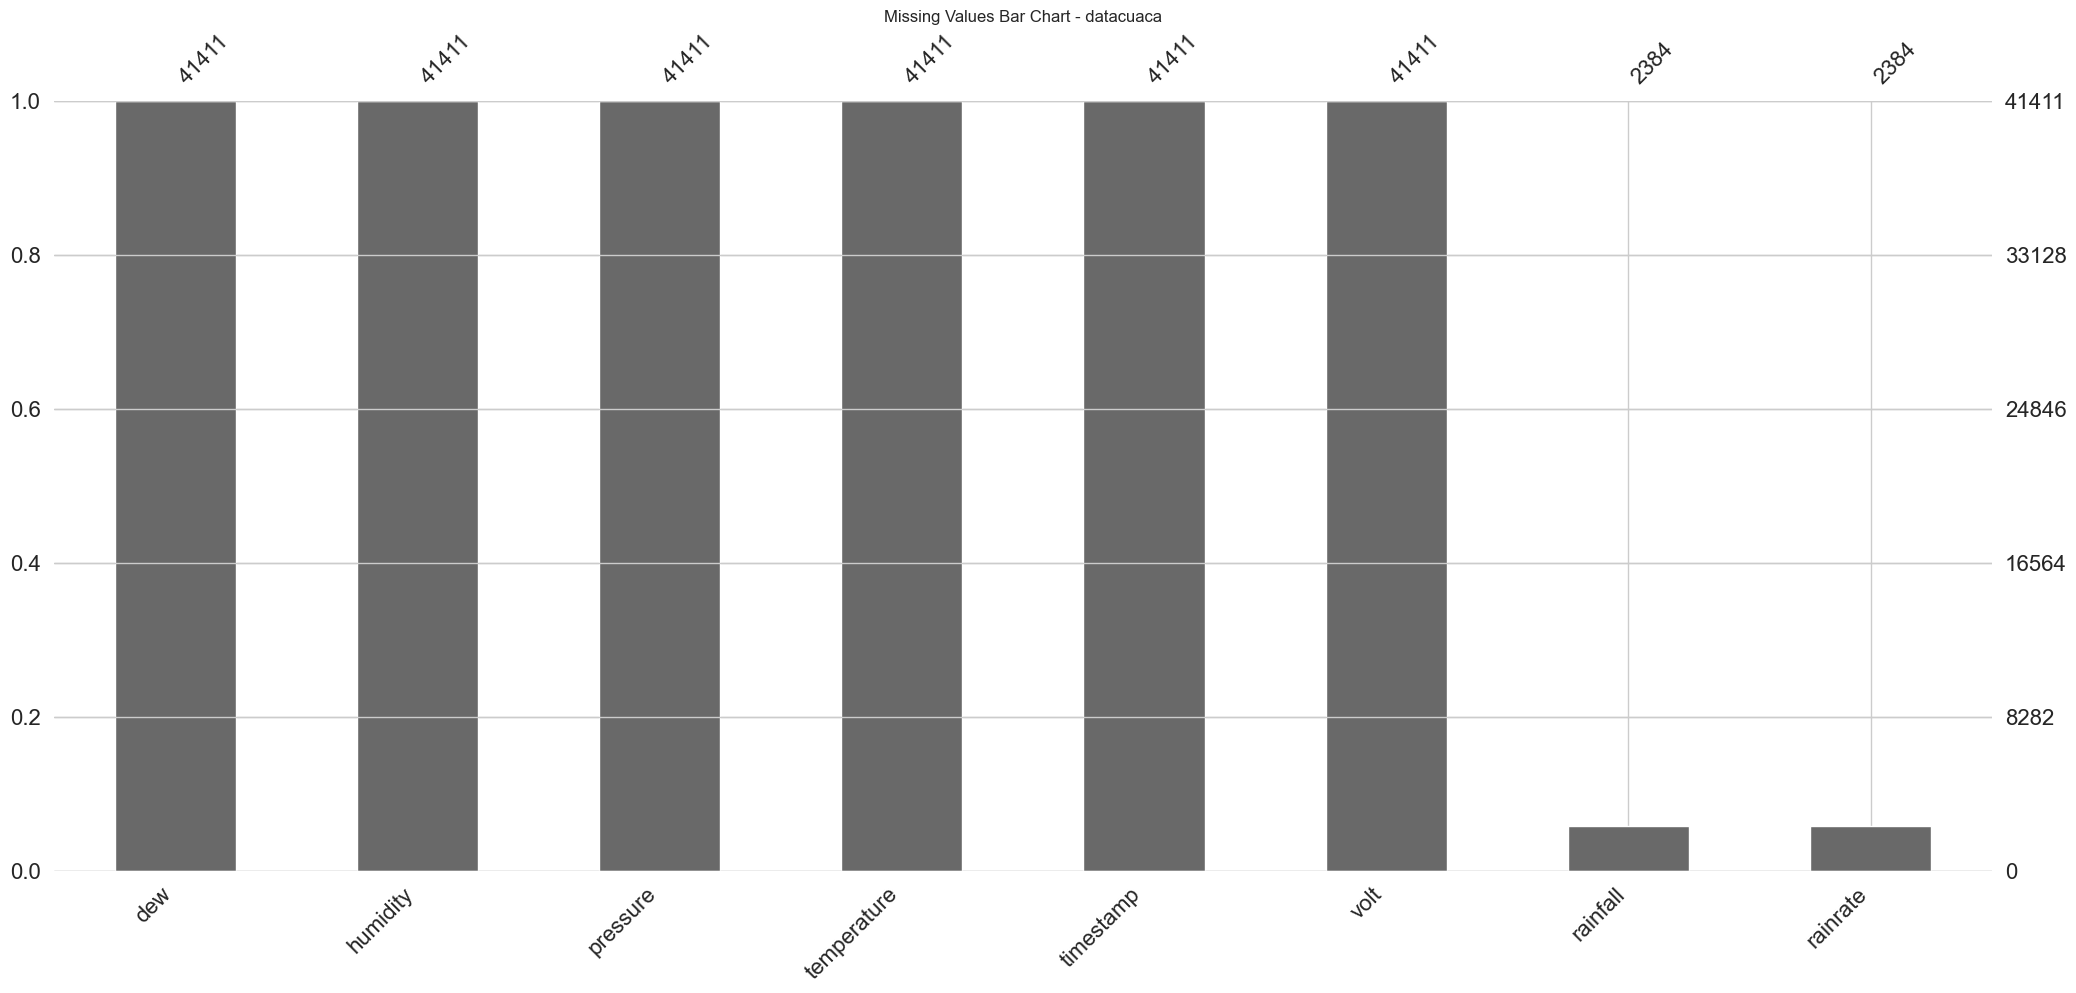

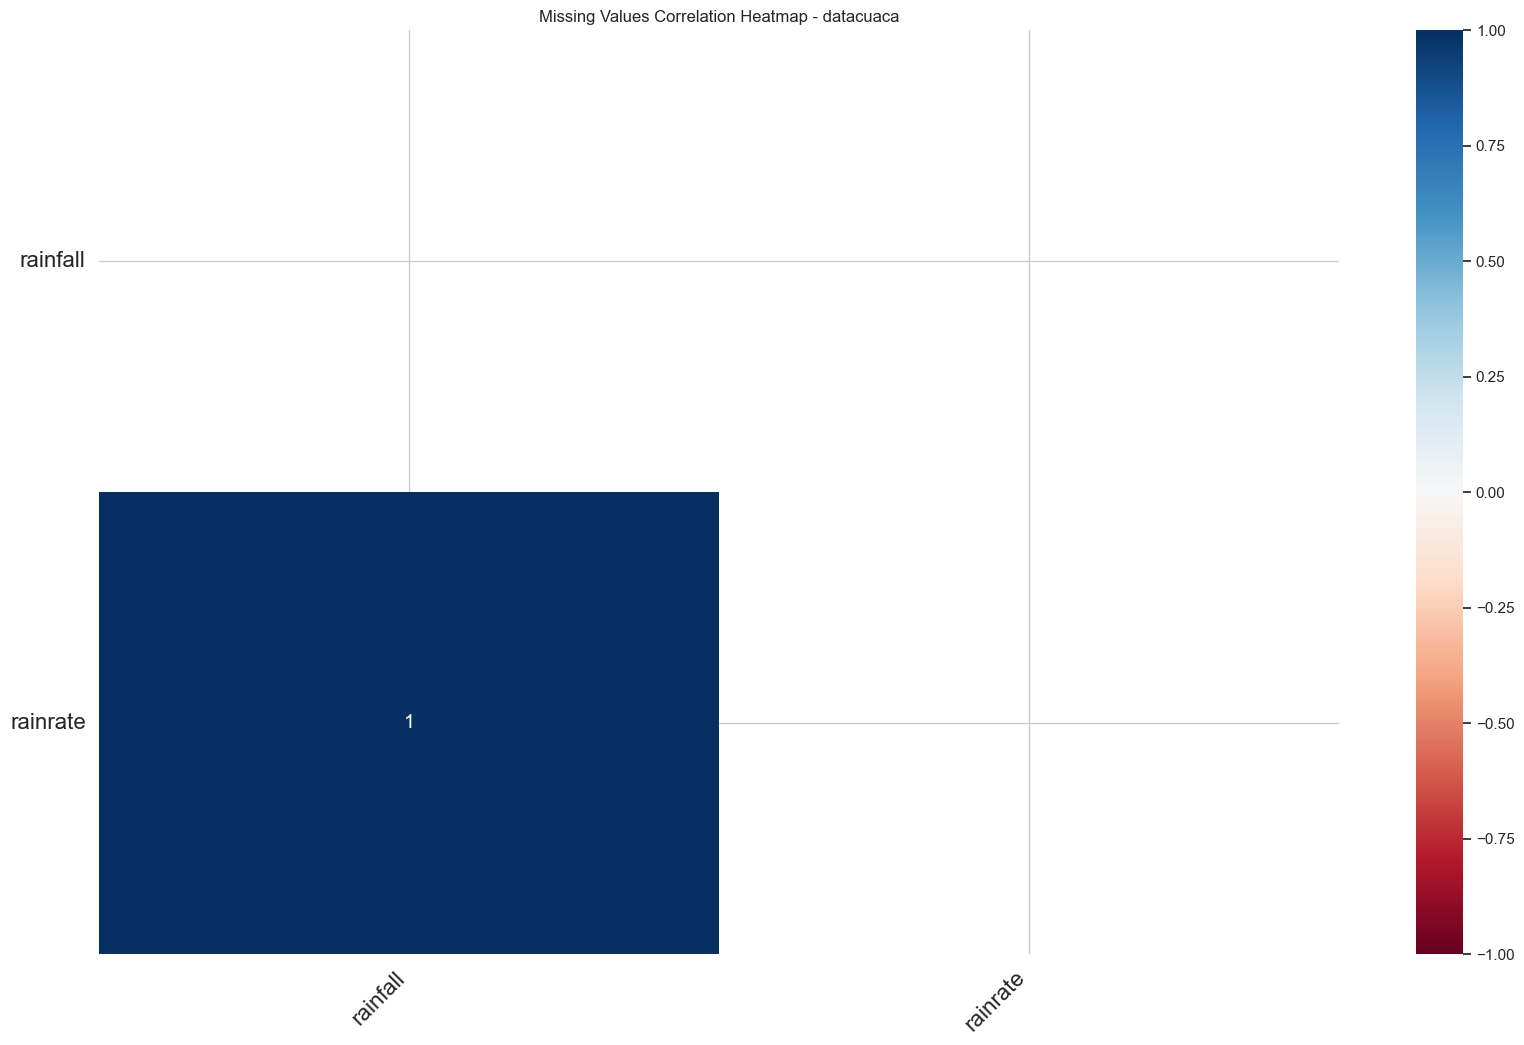

Visualisasi missing values untuk datacuaca2:


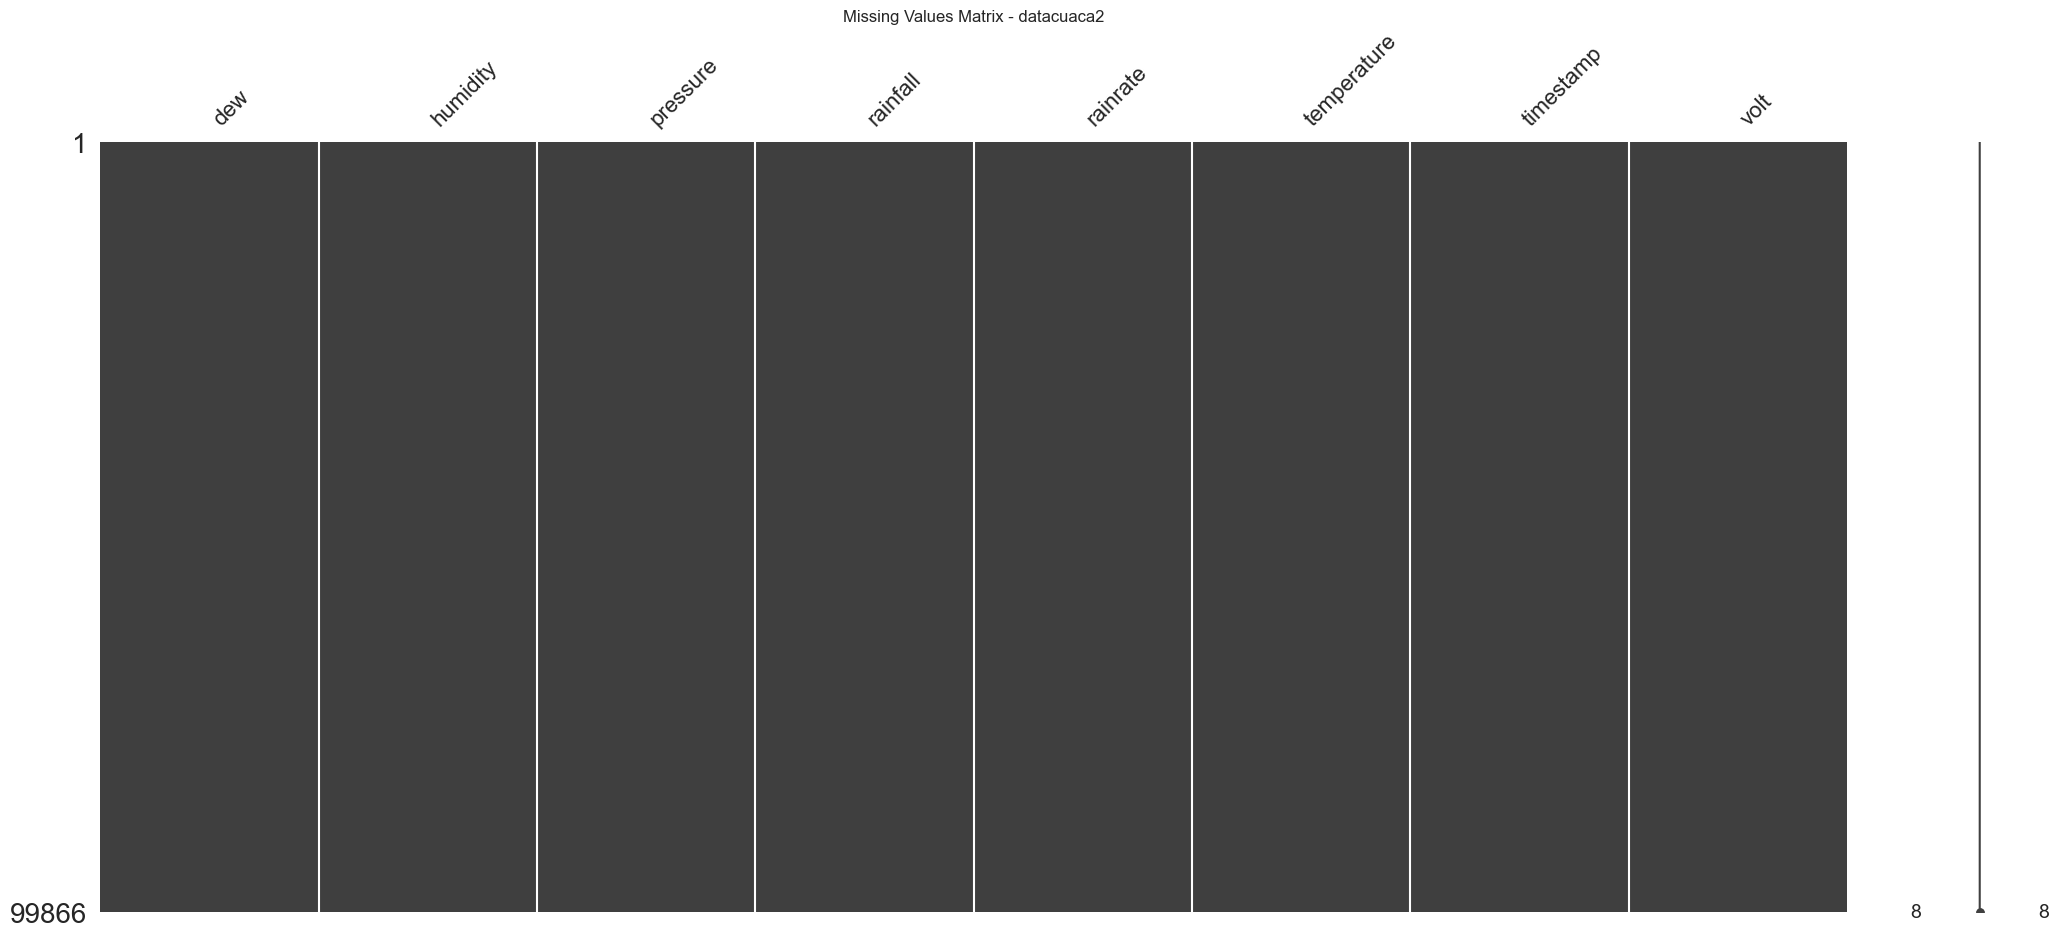

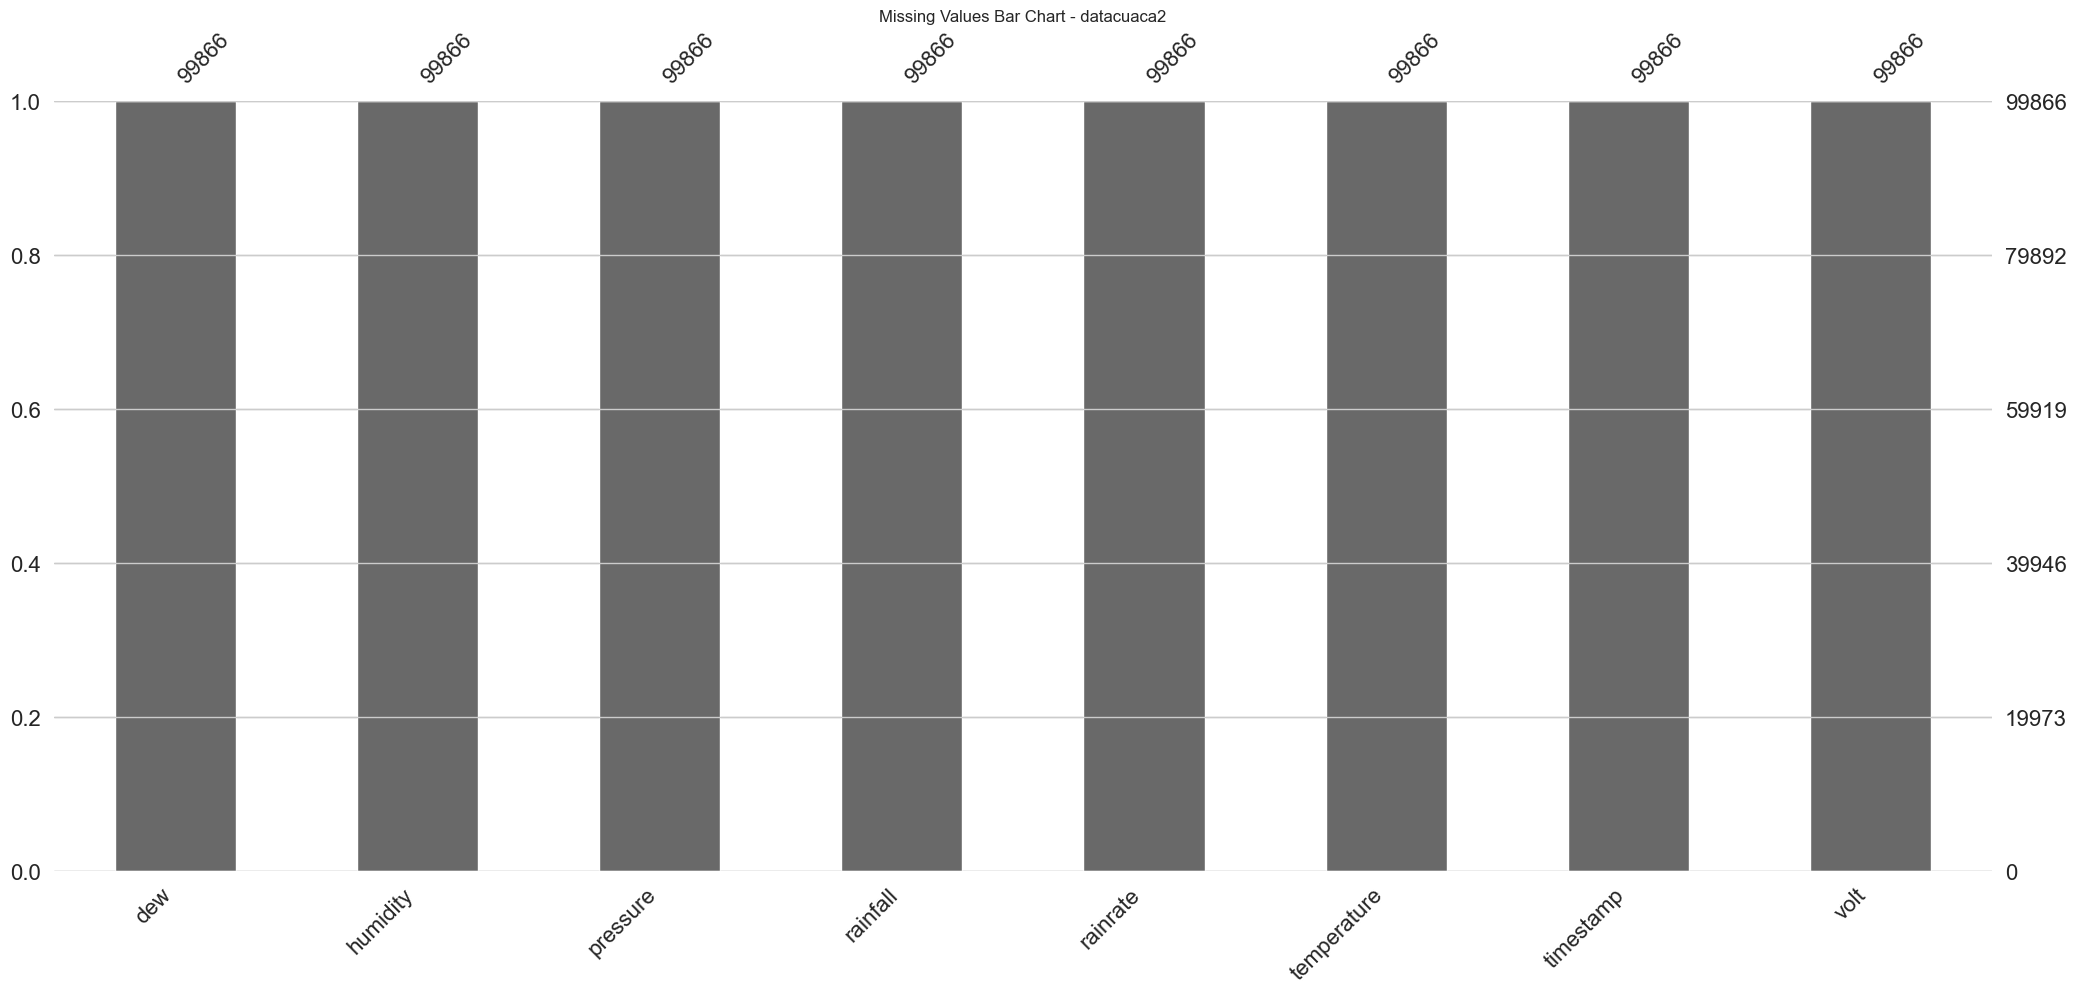

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


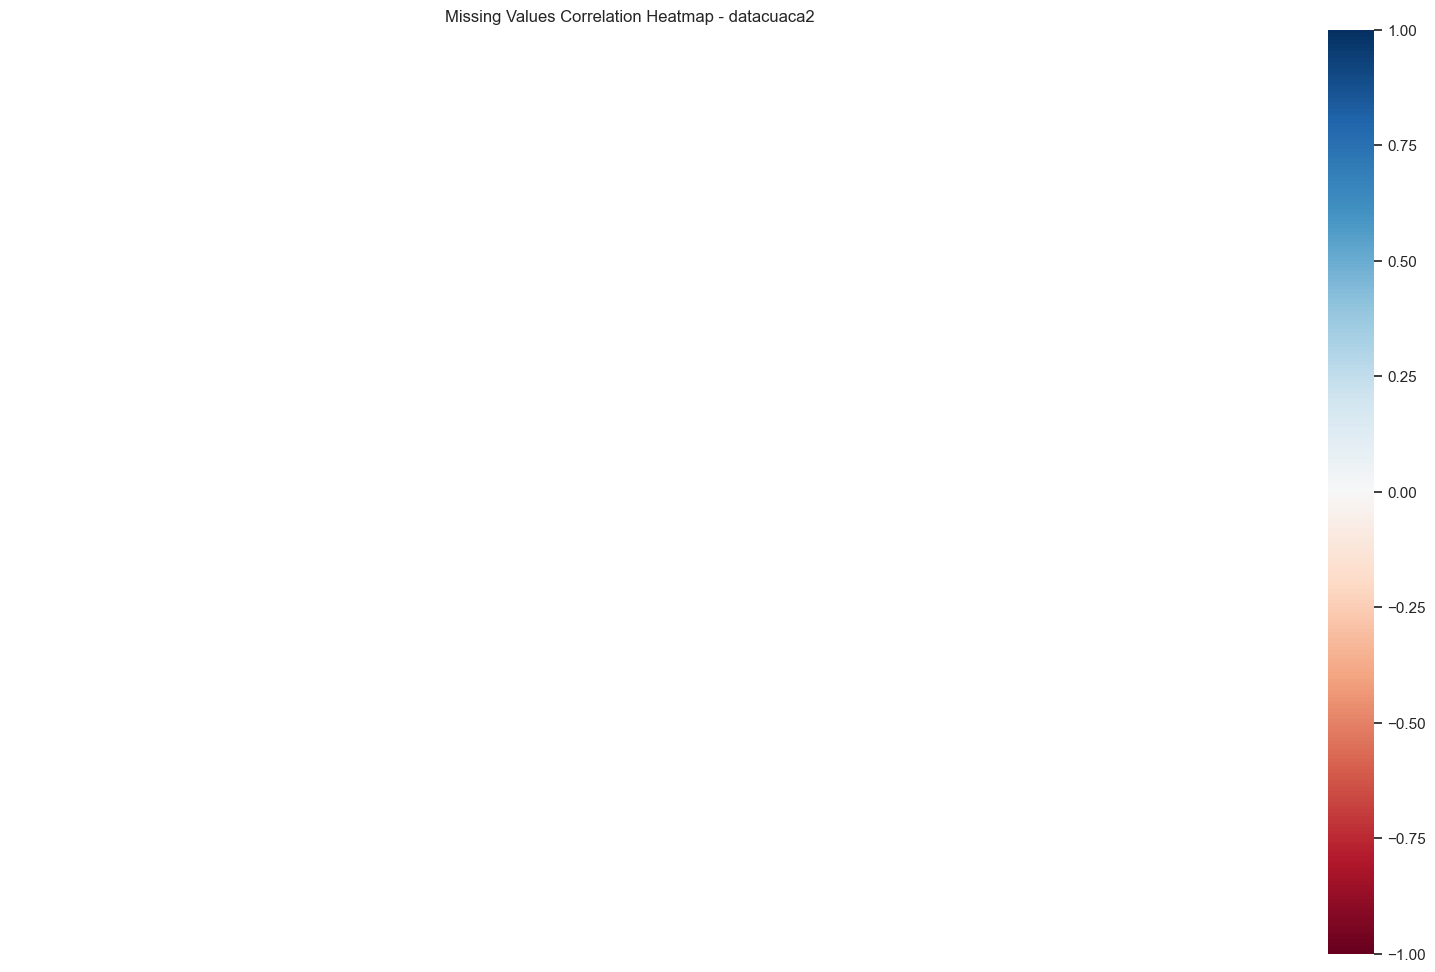

Ringkasan missing values untuk datacuaca:
dew                0
humidity           0
pressure           0
temperature        0
timestamp          0
volt               0
rainfall       39027
rainrate       39027
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew            0
humidity       0
pressure       0
rainfall       0
rainrate       0
temperature    0
timestamp      0
volt           0
dtype: int64


In [14]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

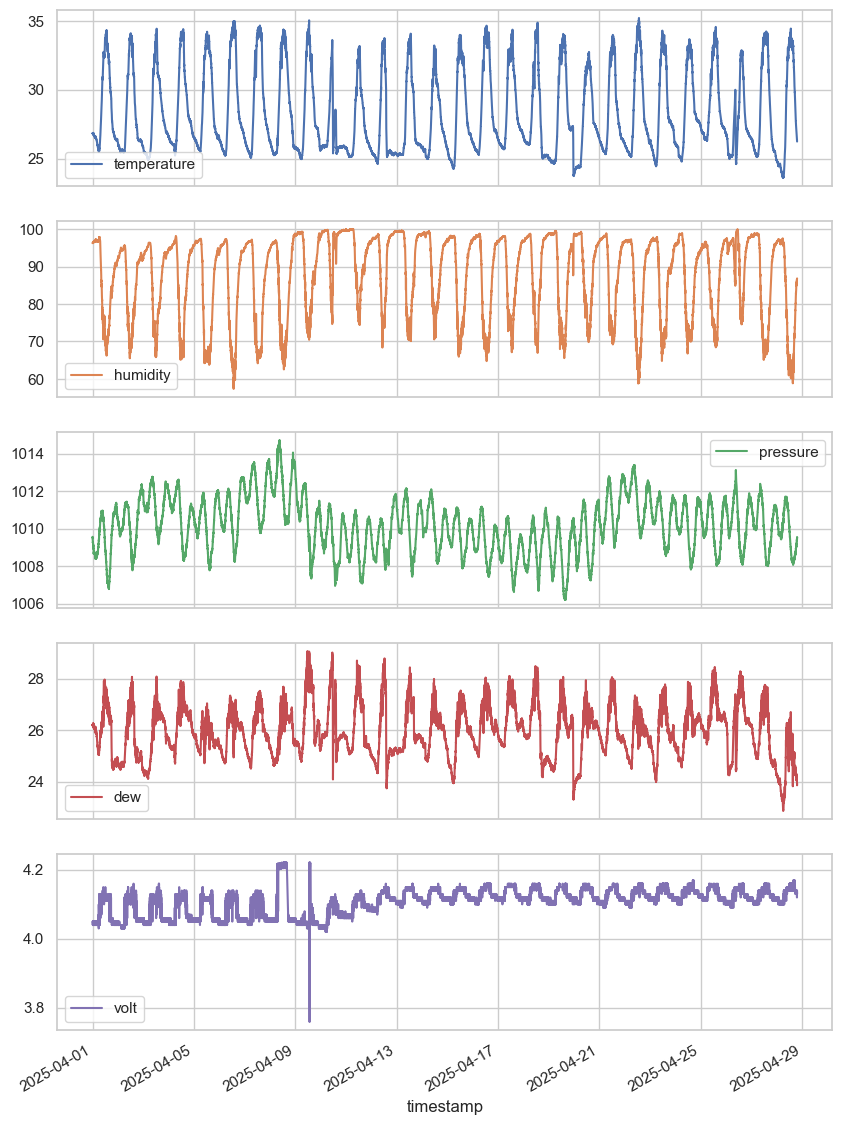

In [15]:
datacuaca.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    #'rainrate',
    #'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [16]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [17]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

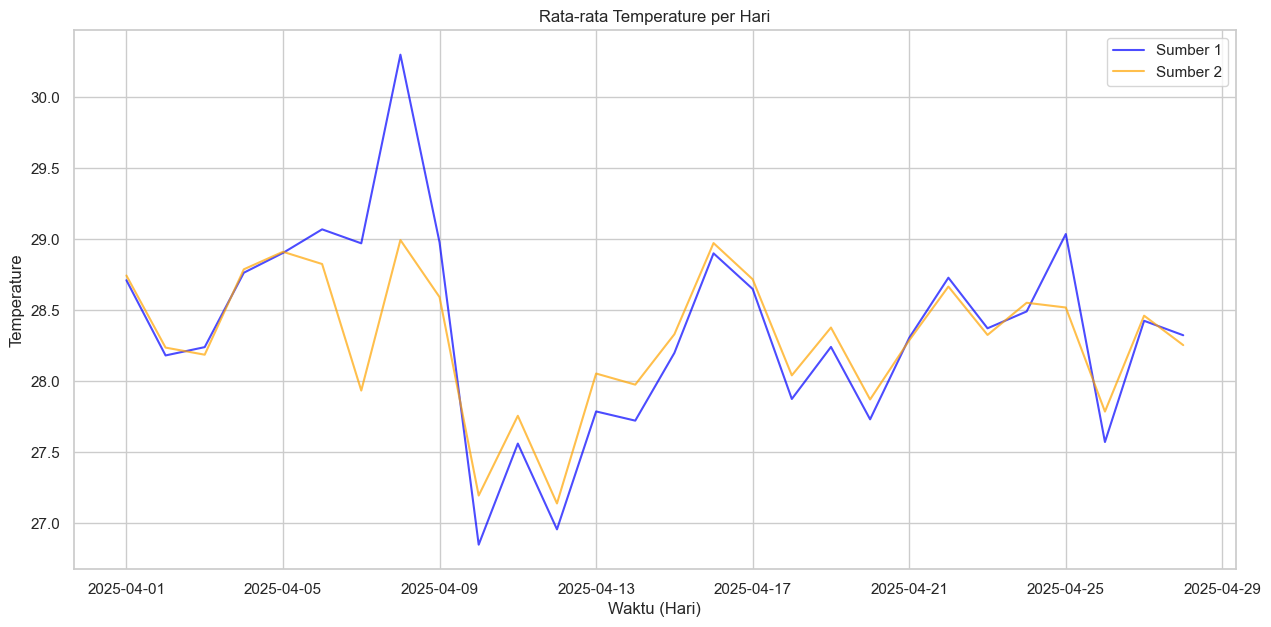

In [18]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
datacuaca['day'] = datacuaca['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat
datacuaca2['day'] = datacuaca2['timestamp'].dt.floor('d')

# Menghitung rata-rata per hari untuk kolom yang dipilih
datacuaca_daily = datacuaca.groupby('day')[column_to_plot].mean().reset_index()
datacuaca2_daily = datacuaca2.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_daily['day'], datacuaca_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_daily['day'], datacuaca2_daily[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

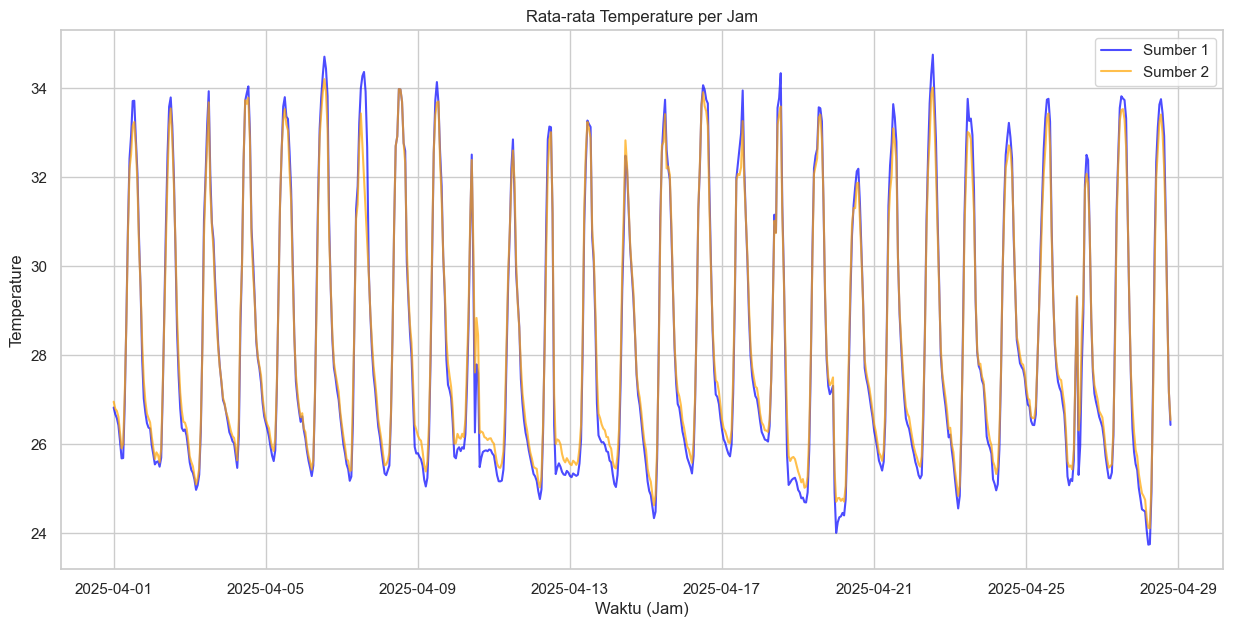

In [19]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat
datacuaca2['hour'] = datacuaca2['timestamp'].dt.floor('h')

# Menghitung rata-rata per jam untuk kolom yang dipilih
datacuaca_hourly = datacuaca.groupby('hour')[column_to_plot].mean().reset_index()
datacuaca2_hourly = datacuaca2.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_hourly['hour'], datacuaca2_hourly[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

Epoch 1/200


d:\conda_env\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.1968 - val_loss: 0.0765
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0877 - val_loss: 0.0723
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0763 - val_loss: 0.0658
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0711 - val_loss: 0.0653
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0624 - val_loss: 0.0551
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0593 - val_loss: 0.0566
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0452 - val_loss: 0.0413
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0415 - val_loss: 0.0344
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0333 - val_loss: 0.0450
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0295 - val_loss: 0.0327
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0292 - val_loss: 0.0334
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0286 - val_loss: 0.0314
E

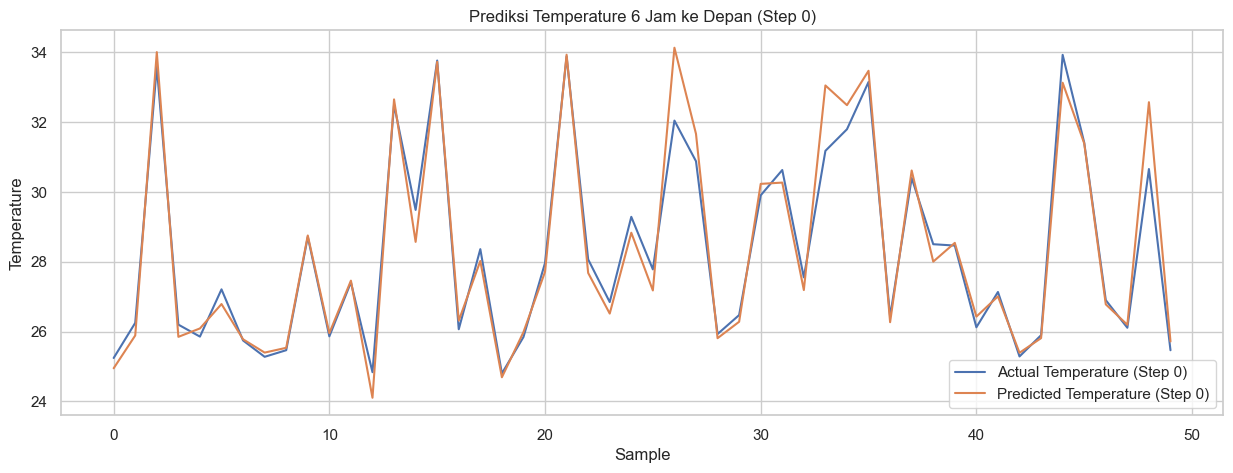

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 6, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,532 (345.83 KB)

 Trainable params: 29,510 (115.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,022 (230.56 KB)

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata temperature
datacuaca_hourly = datacuaca.groupby('hour')['temperature'].mean().reset_index()

# Pastikan data sudah terurut berdasarkan waktu
datacuaca_hourly = datacuaca_hourly.sort_values(by='hour').reset_index(drop=True)

# Menyiapkan data untuk model
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - lookback - forecast_horizon):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback:i + lookback + forecast_horizon])
    return np.array(X), np.array(y)

# Normalisasi data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(datacuaca_hourly[['temperature']])

# Membuat dataset
lookback = 6  # Menggunakan data 6 jam sebelumnya
forecast_horizon = 6  # Memprediksi 6 jam ke depan
X, y = create_sequences(temperature_scaled, lookback, forecast_horizon)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(lookback, 1), return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(forecast_horizon)
])

# Mengatur optimizer dengan learning rate khusus
optimizer = Adam(learning_rate=0.01)  # Ubah nilai learning rate sesuai kebutuhan
model.compile(optimizer=optimizer, loss='mse')

# Melatih model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

# Membuat prediksi
predictions = model.predict(X_test)

# Membalikkan normalisasi untuk interpretasi hasil
# Reshape predictions dan y_test agar menjadi 2D sebelum inverse_transform
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Menampilkan hasil prediksi vs data aktual untuk langkah pertama (step 0 dari 6 jam ke depan)
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled[:50, 0], label='Actual Temperature (Step 0)')
plt.plot(predictions_rescaled[:50, 0], label='Predicted Temperature (Step 0)')
plt.legend()
plt.title('Prediksi Temperature 6 Jam ke Depan (Step 0)')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.show()
model.summary()

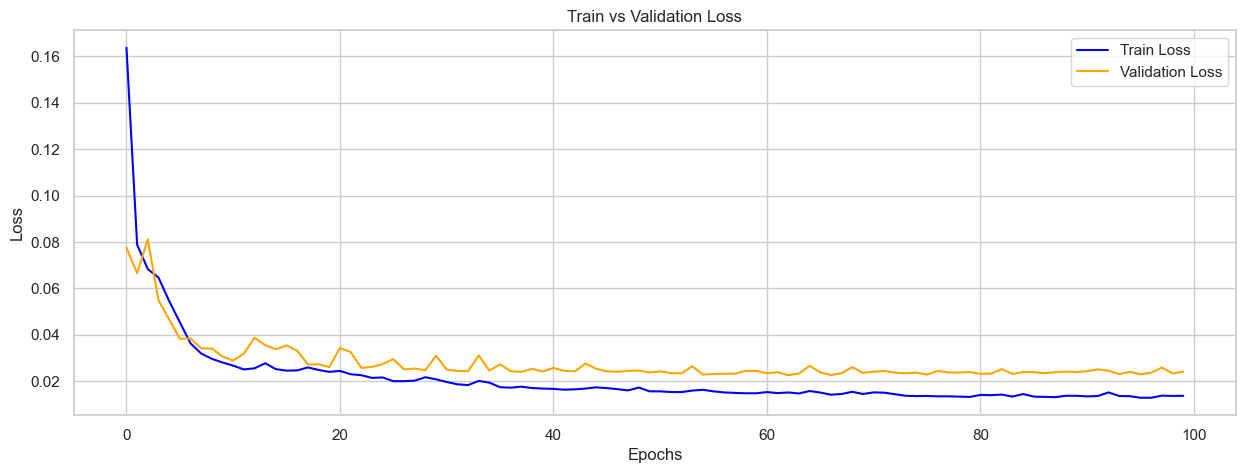

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()